2.229737
7.5305257
7.7561574
5.84603
5.3108044
4.652316
5.685721
5.7025194


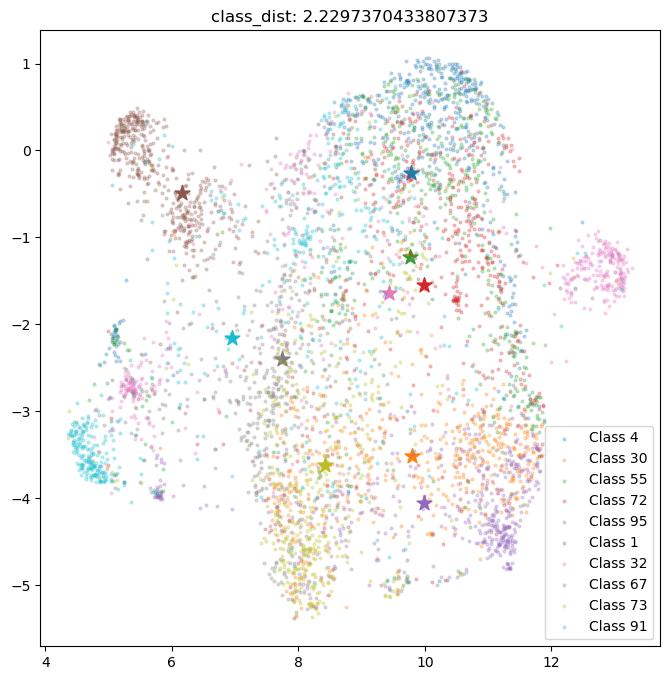

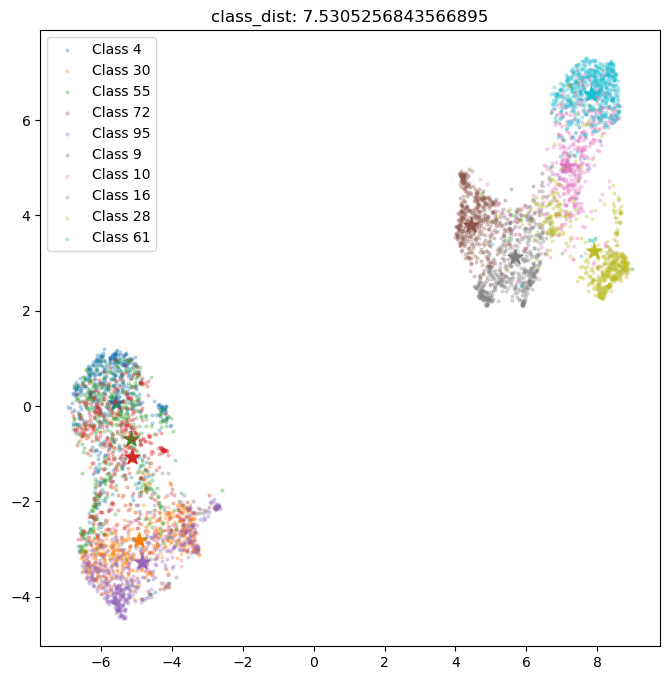

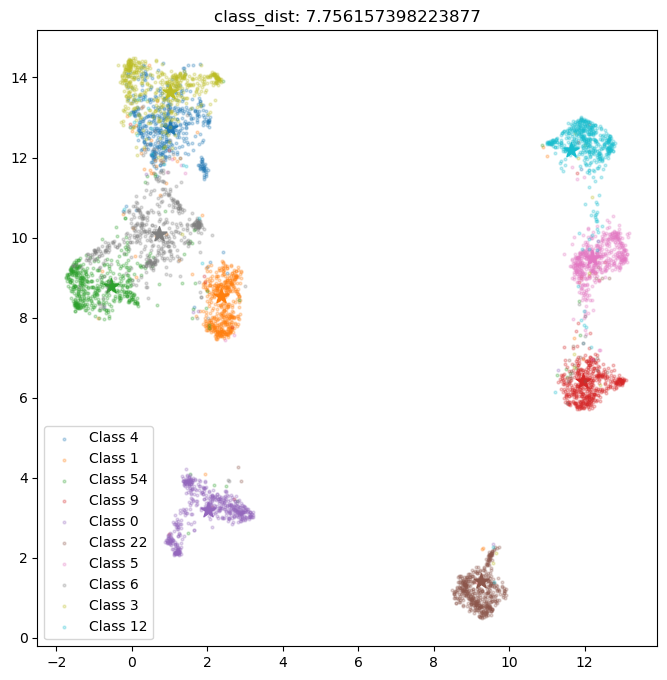

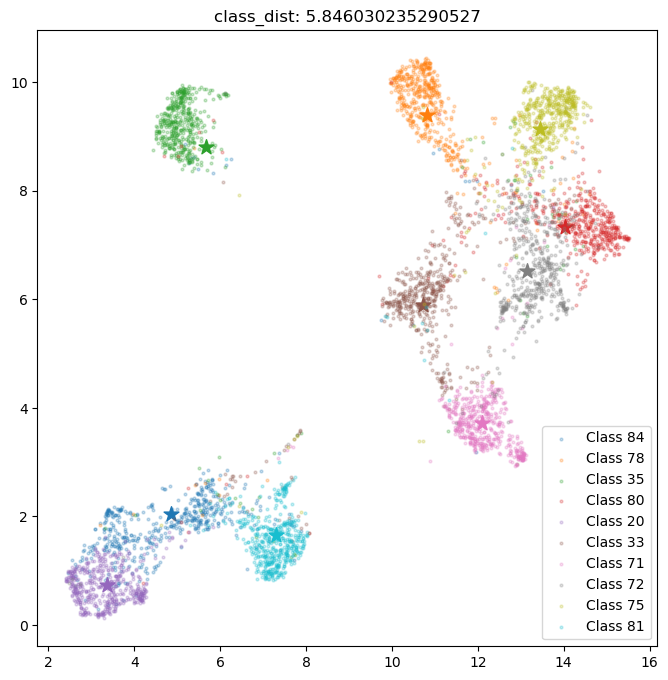

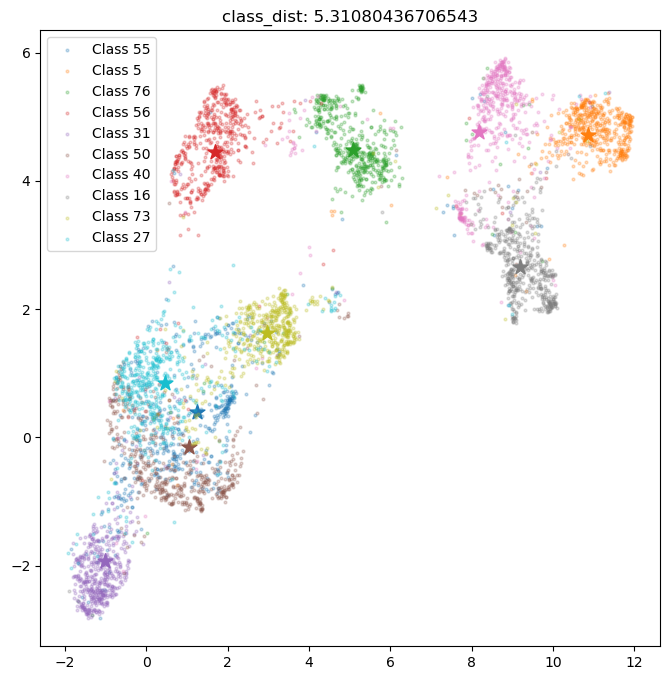

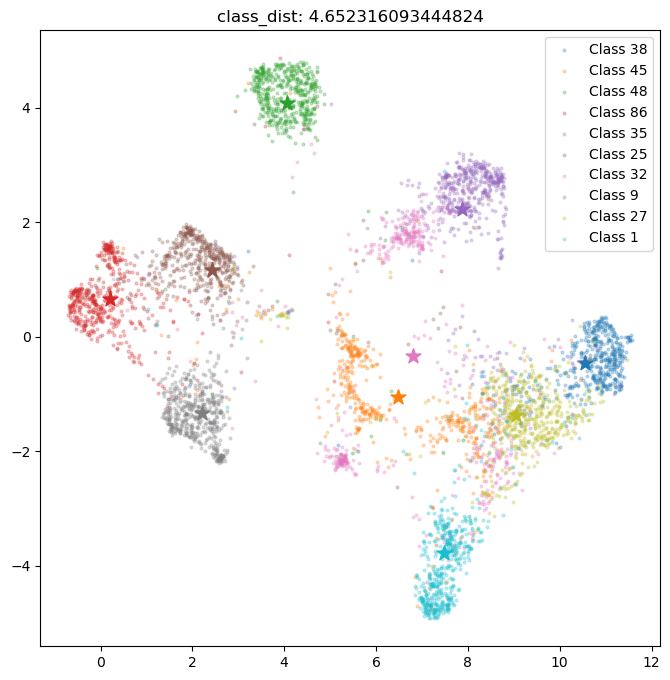

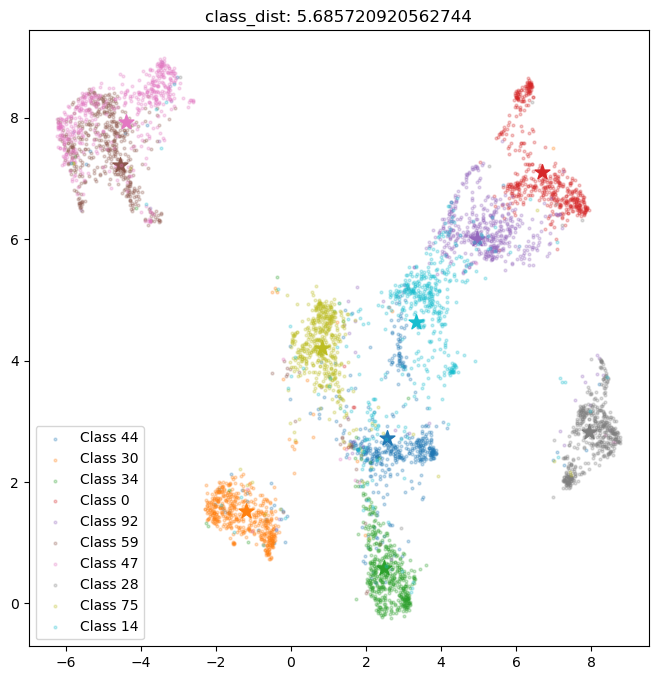

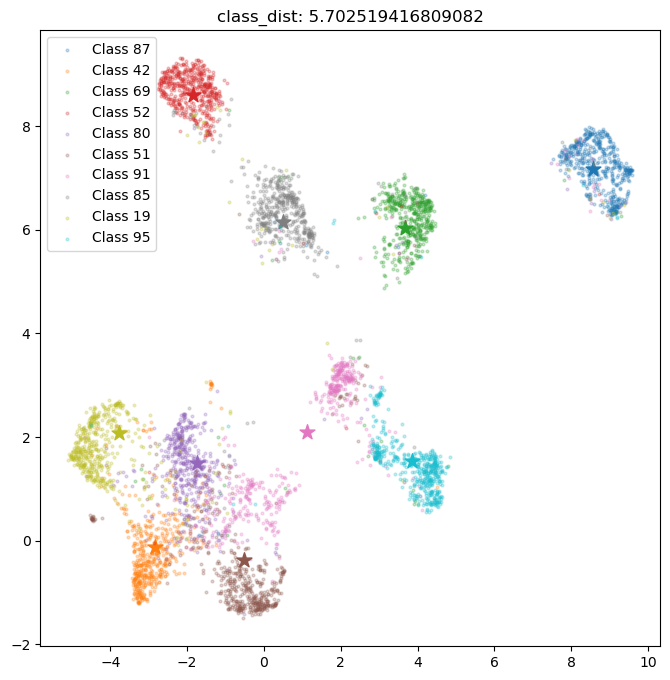

In [3]:
import sys
from pathlib import Path
import random

import torch

work_path = Path(next((p for p in Path("__file__").resolve().parents if p.name == "Research"), None))
torchlib_path = str(work_path / Path("app/torch_libs"))
sys.path.append(torchlib_path)

from datasets import Datasets
from trans import Trans
from trainer import Trainer

ds = Datasets(root=work_path / "assets/datasets/")
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

import torchvision

print(ds("cifar100_train").limit_class(labels=[4, 30, 55, 72, 95, 1, 32, 67, 73, 91]).calc_classdist(plot=True))
print(ds("cifar100_train").limit_class(labels=[4, 30, 55, 72, 95, 9, 10, 16, 28, 61]).calc_classdist(plot=True))
print(ds("cifar100_train").limit_class(labels=[4, 1, 54, 9, 0, 22, 5, 6, 3, 12]).calc_classdist(plot=True))
print(ds("cifar100_train").limit_class(labels=random.sample(range(100), 10)).calc_classdist(plot=True))
print(ds("cifar100_train").limit_class(labels=random.sample(range(100), 10)).calc_classdist(plot=True))
print(ds("cifar100_train").limit_class(labels=random.sample(range(100), 10)).calc_classdist(plot=True))
print(ds("cifar100_train").limit_class(labels=random.sample(range(100), 10)).calc_classdist(plot=True))
print(ds("cifar100_train").limit_class(labels=random.sample(range(100), 10)).calc_classdist(plot=True))
# transform_l = [torchvision.transforms.Lambda(lambda image: image.convert("RGB")), torchvision.transforms.ToTensor(), torchvision.transforms.Resize((32, 32), antialias=True), torchvision.transforms.Resize((224, 224), antialias=True)]
# print(ds("stl10_train").calc_classdist(plot=True))
# print(ds("stl10_train").calc_classdist(plot=True, transform_l=transform_l))





In [4]:
import numpy as np
import random

cifar100_sc = np.array([
    [4, 30, 55, 72, 95], 
    [1, 32, 67, 73, 91], 
    [54, 62, 70, 82, 92], 
    [9, 10, 16, 28, 61], 
    [0, 51, 53, 57, 83], 
    [22, 39, 40, 86, 87], 
    [5, 20, 25, 84, 94], 
    [6, 7, 14, 18, 24], 
    [3, 42, 43, 88, 97], 
    [12, 17, 37, 68, 76], 
    [23, 33, 49, 60, 71], 
    [15, 19, 21, 31, 38], 
    [34, 63, 64, 66, 75], 
    [26, 45, 77, 79, 99], 
    [2, 11, 35, 46, 98], 
    [27, 29, 44, 78, 93], 
    [36, 50, 65, 74, 80], 
    [47, 52, 56, 59, 96], 
    [8, 13, 48, 58, 90], 
    [41, 69, 81, 85, 89]
])

ds_hard = [np.concatenate([cifar100_sc[i], cifar100_sc[i+1]]) for i in range(0, len(cifar100_sc), 2)]
ds_easy1 = [cifar100_sc[:10, i] for i in range(len(cifar100_sc[0]))] + [cifar100_sc[10:, i] for i in range(len(cifar100_sc[0]))]
ds_easy2 = [cifar100_sc[::2, i] for i in range(len(cifar100_sc[0]))] + [cifar100_sc[1::2, i] for i in range(len(cifar100_sc[0]))]
ds_rand = [random.sample(range(100), 10) for _ in range(50)]

# print(np.array(ds_hard).shape)
# print(np.array(ds_easy1).shape)
# print(np.array(ds_easy2).shape)
# print(np.array(ds_rand).shape)

ds = ds_hard[:10] + ds_easy1[:5] + ds_easy2[:5] + ds_rand[:30]

print(np.array(ds).shape)

(50, 10)


In [5]:
a = [[1, 2], [2, 3], [4, 5]]
b = [[3, 4], [2, 3], [7, 8]]
# a.extend(b)
a = a[:2] + b[:2]
print(a)

[[1, 2], [2, 3], [3, 4], [2, 3]]
